In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import gensim
import pickle
import random
import itertools

In [12]:
data=pd.read_csv('news_articles.csv')

In [13]:
data.head()

Article_Id                                              Title  \
0           0  14 dead after bus falls into canal in Telangan...   
1           1  Pratibha Tiwari molested on busy road   Saath ...   
2           2  US  South Korea begin joint military drill ami...   
3           3  Illegal construction in Bengaluru  Will my hou...   
4           4  Punjab Gau Rakshak Dal chief held for assaulti...   

               Author                       Date  \
0    Devyani Sultania  August 22, 2016 12:34 IST   
1      Suparno Sarkar  August 22, 2016 19:47 IST   
2    Namrata Tripathi  August 22, 2016 18:10 IST   
3  S V Krishnamachari  August 22, 2016 17:39 IST   
4      Pranshu Rathee  August 22, 2016 17:34 IST   

                                             Content  \
0  At least 14 people died and 17 others were inj...   
1  TV actress Pratibha Tiwari  who is best known ...   
2  The United States and South Korea began a join...   
3  The relentless drive by Bengaluru s  Bangalore...   
4  Punjab Gau Raksha Dal chief Satish Kumar and h...   

                                                 URL  
0  http://www.ibtimes.co.in/14-dead-after-bus-fal...  
1                                                NaN  
2  http://www.ibtimes.co.in/us-south-korea-begin-...  
3  http://www.ibtimes.co.in/illegal-construction-...  
4  http://www.ibtimes.co.in/punjab-gau-rakshak-da...

In [14]:
len(data)

4831

In [15]:
data['word_count'] = data['Content'].apply(lambda x: len(str(x).split(" ")))
data[['Content','word_count']].head()

Content  word_count
0  At least 14 people died and 17 others were inj...         233
1  TV actress Pratibha Tiwari  who is best known ...         231
2  The United States and South Korea began a join...         247
3  The relentless drive by Bengaluru s  Bangalore...         355
4  Punjab Gau Raksha Dal chief Satish Kumar and h...         272

In [16]:
data['char_count'] = data['Content'].str.len() ## this also includes spaces
data[['Content','char_count']].head()

Content  char_count
0  At least 14 people died and 17 others were inj...        1355
1  TV actress Pratibha Tiwari  who is best known ...        1215
2  The United States and South Korea began a join...        1369
3  The relentless drive by Bengaluru s  Bangalore...        2024
4  Punjab Gau Raksha Dal chief Satish Kumar and h...        1467

In [17]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Content'].apply(lambda x: avg_word(x))
data[['Content','avg_word']].head()

Content  avg_word
0  At least 14 people died and 17 others were inj...  5.022523
1  TV actress Pratibha Tiwari  who is best known ...  4.890000
2  The United States and South Korea began a join...  4.920705
3  The relentless drive by Bengaluru s  Bangalore...  5.104615
4  Punjab Gau Raksha Dal chief Satish Kumar and h...  4.868852

In [18]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['stopwords'] = data['Content'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Content','stopwords']].head()

Content  stopwords
0  At least 14 people died and 17 others were inj...         85
1  TV actress Pratibha Tiwari  who is best known ...         81
2  The United States and South Korea began a join...         76
3  The relentless drive by Bengaluru s  Bangalore...        133
4  Punjab Gau Raksha Dal chief Satish Kumar and h...         90

In [19]:
data['hastags'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Content','hastags']].head()

Content  hastags
0  At least 14 people died and 17 others were inj...        0
1  TV actress Pratibha Tiwari  who is best known ...        0
2  The United States and South Korea began a join...        0
3  The relentless drive by Bengaluru s  Bangalore...        0
4  Punjab Gau Raksha Dal chief Satish Kumar and h...        0

In [20]:
data['numerics'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Content','numerics']].head()

Content  numerics
0  At least 14 people died and 17 others were inj...         6
1  TV actress Pratibha Tiwari  who is best known ...         4
2  The United States and South Korea began a join...         3
3  The relentless drive by Bengaluru s  Bangalore...         2
4  Punjab Gau Raksha Dal chief Satish Kumar and h...        12

In [21]:
data['upper'] = data['Content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Content','upper']].head()

Content  upper
0  At least 14 people died and 17 others were inj...      0
1  TV actress Pratibha Tiwari  who is best known ...      4
2  The United States and South Korea began a join...      8
3  The relentless drive by Bengaluru s  Bangalore...      4
4  Punjab Gau Raksha Dal chief Satish Kumar and h...      3

In [22]:
data = data['Content'].apply(lambda x: x.lower())
data.head()

0    at least 14 people died and 17 others were inj...
1    tv actress pratibha tiwari  who is best known ...
2    the united states and south korea began a join...
3    the relentless drive by bengaluru s  bangalore...
4    punjab gau raksha dal chief satish kumar and h...
Name: Content, dtype: object

In [23]:
#REMOCING PUNCTUATIONS AND NUMBERS
data = data.str.replace('[^\w\s]','')
data = data.str.replace('\d+', '')
data.head()

0    at least  people died and  others were injured...
1    tv actress pratibha tiwari  who is best known ...
2    the united states and south korea began a join...
3    the relentless drive by bengaluru s  bangalore...
4    punjab gau raksha dal chief satish kumar and h...
Name: Content, dtype: object

## Cleaning 

In [24]:
#REMOVING STOPWORDS 
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manpreetdhingra1996/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [26]:

test=pd.DataFrame(data)
test.columns=["Content"]
test.head()

Content
0  at least  people died and  others were injured...
1  tv actress pratibha tiwari  who is best known ...
2  the united states and south korea began a join...
3  the relentless drive by bengaluru s  bangalore...
4  punjab gau raksha dal chief satish kumar and h...

In [27]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['Content_without_stopwords'] = test['Content'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
test.head()

Content  \
0  at least  people died and  others were injured...   
1  tv actress pratibha tiwari  who is best known ...   
2  the united states and south korea began a join...   
3  the relentless drive by bengaluru s  bangalore...   
4  punjab gau raksha dal chief satish kumar and h...   

                           Content_without_stopwords  
0  least people died others injured bus travellin...  
1  tv actress pratibha tiwari best known role saa...  
2  united states south korea began joint military...  
3  relentless drive bengaluru bangalore civic aut...  
4  punjab gau raksha dal chief satish kumar accom...

In [28]:
#Removing Common Words
freq = pd.Series(' '.join(test['Content_without_stopwords']).split()).value_counts()[:10]
freq

india      5048
said       4945
also       4404
one        2695
new        2491
film       2409
year       2397
rs         2391
android    2069
two        2014
dtype: int64

In [29]:
freq.index

Index(['india', 'said', 'also', 'one', 'new', 'film', 'year', 'rs', 'android',
       'two'],
      dtype='object')

In [30]:
freq = list(freq.index)
test['updated'] = test['Content_without_stopwords'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test.head()

Content  \
0  at least  people died and  others were injured...   
1  tv actress pratibha tiwari  who is best known ...   
2  the united states and south korea began a join...   
3  the relentless drive by bengaluru s  bangalore...   
4  punjab gau raksha dal chief satish kumar and h...   

                           Content_without_stopwords  \
0  least people died others injured bus travellin...   
1  tv actress pratibha tiwari best known role saa...   
2  united states south korea began joint military...   
3  relentless drive bengaluru bangalore civic aut...   
4  punjab gau raksha dal chief satish kumar accom...   

                                             updated  
0  least people died others injured bus travellin...  
1  tv actress pratibha tiwari best known role saa...  
2  united states south korea began joint military...  
3  relentless drive bengaluru bangalore civic aut...  
4  punjab gau raksha dal chief satish kumar accom...

In [31]:
#Removing Rare words
freq = pd.Series(' '.join(test['Content_without_stopwords']).split()).value_counts()[-10:]
freq

pandipuram         1
featurelike        1
rajali             1
motored            1
voicecontrolled    1
brightens          1
neutralised        1
madhouse           1
samay              1
bielecki           1
dtype: int64

In [32]:
freq = list(freq.index)
test['updated'] = test['updated'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test.head()

Content  \
0  at least  people died and  others were injured...   
1  tv actress pratibha tiwari  who is best known ...   
2  the united states and south korea began a join...   
3  the relentless drive by bengaluru s  bangalore...   
4  punjab gau raksha dal chief satish kumar and h...   

                           Content_without_stopwords  \
0  least people died others injured bus travellin...   
1  tv actress pratibha tiwari best known role saa...   
2  united states south korea began joint military...   
3  relentless drive bengaluru bangalore civic aut...   
4  punjab gau raksha dal chief satish kumar accom...   

                                             updated  
0  least people died others injured bus travellin...  
1  tv actress pratibha tiwari best known role saa...  
2  united states south korea began joint military...  
3  relentless drive bengaluru bangalore civic aut...  
4  punjab gau raksha dal chief satish kumar accom...

In [33]:
#TOKENIZATION
from textblob import TextBlob
for i in range(len(data)):
    tokens=print(TextBlob(test['updated'][i]).words)
    

['least', 'people', 'died', 'others', 'injured', 'bus', 'travelling', 'hyderabad', 'kakinada', 'plunged', 'canal', 'bridge', 'accidentprone', 'stretch', 'hyderabadkhammam', 'highway', 'telangana', 'early', 'monday', 'morning', 'injured', 'admitted', 'government', 'general', 'hospital', 'treatment', 'seven', 'people', 'died', 'spot', 'others', 'succumbed', 'injuries', 'undergoing', 'treatment', 'hospital', 'passengers', 'belonged', 'east', 'west', 'godavari', 'districts', 'andhra', 'pradesh', 'bus', 'owned', 'private', 'operator', 'yatra', 'genie', 'commenced', 'journey', 'hyderabad', 'p', 'sunday', 'khammam', 'superintendent', 'police', 'shah', 'nawaz', 'khan', 'quoted', 'hindustan', 'times', 'saying', 'accident', 'happened', 'around', 'driver', 'slammed', 'brakes', 'avoid', 'collision', 'another', 'vehicle', 'coming', 'opposite', 'direction', 'bridge', 'nagarjunsagar', 'project', 'left', 'canal', 'nayankangudem', 'village', 'khammam', 'district', 'daily', 'reported', 'bus', 'hit', 'pa

['ibtimes', 'rating', 'every', 'keralite', 'least', 'friend', 'relative', 'struggling', 'support', 'family', 'working', 'tirelessly', 'dubai', 'megastar', 'mammootty', 'pathamari', 'struggling', 'malayalis', 'dubai', 'heard', 'many', 'success', 'stories', 'malayalis', 'abroad', 'many', 'struggling', 'middle', 'class', 'people', 'well', 'continuously', 'work', 'hard', 'support', 'families', 'familiar', 'story', 'many', 'us', 'suspense', 'element', 'still', 'sit', 'firmly', 'seats', 'see', 'happens', 'next', 'pathemari', 'celebs', 'review', 'without', 'twists', 'turns', 'pathemari', 'story', 'sacrifice', 'hardships', 'thousands', 'people', 'spend', 'majority', 'life', 'different', 'country', 'support', 'family', 'financially', 'plot', 'pallikal', 'narayanan', 'mammootty', 'migrates', 'illegally', 'dubai', 'along', 'many', 'teenagers', 'launchi', 'velayudhan', 'siddique', 'sloop', 'forced', 'take', 'responsibility', 'family', 'parents', 'brother', 'sisters', 'even', 'decides', 'settle', '

['nikhil', 'siddharth', 'shankarabharanam', 'sankarabharanam', 'opened', 'average', 'response', 'us', 'box', 'office', 'failed', 'beat', 'first', 'weekend', 'collection', 'records', 'size', 'zero', 'kumari', 'f', 'nikhil', 'siddharth', 'tried', 'experiment', 'roles', 'subjects', 'proved', 'successful', 'scoring', 'three', 'backtoback', 'hits', 'like', 'swamy', 'ra', 'ra']
['sukumar', 'maiden', 'production', 'kumari', 'f', 'grossed', 'crore', 'worldwide', 'box', 'office', 'days', 'movie', 'announced', 'superhit', 'telugu', 'movies', 'release', 'kumari', 'f', 'hyped', 'lot', 'various', 'promotional', 'activities', 'helped', 'movie', 'register', 'good', 'advance', 'bookings', 'released', 'cinema', 'halls', 'andhra', 'pradesh', 'telangana', 'screens', 'parts', 'screens', 'international', 'markets', 'graced', 'around', 'theatres', 'across', 'globe', 'november', 'despite', 'clashing', 'kamal', 'haasan', 'cheekati', 'raajyam', 'spectre']
['ilayathalapathy', 'vijay', 'seems', 'highly', 'impres

['director', 'martin', 'prakkat', 'upcoming', 'malayalam', 'movie', 'charlie', 'dulquer', 'salmaan', 'parvathy', 'lead', 'roles', 'news', 'ever', 'since', 'went', 'floors', 'shooting', 'wrapped', 'late', 'september', 'makers', 'released', 'photo', 'tessa', 'charlie', 'played', 'lead', 'actors', 'sets', 'know', 'keeping', 'pics', 'promos', 'charlie', 'low', 'long', 'time', 'always', 'makes', 'sense', 'start', 'promos', 'time', 'closer', 'release', 'image', 'featuring', 'tessa', 'charlie', 'dulquer', 'posted', 'facebook', 'handle', 'saturday', 'evening', 'posters', 'charlie', 'looks', 'promising', 'sources', 'close', 'reveal', 'expected', 'hit', 'theatres', 'november', 'national', 'award', 'winner', 'gopi', 'sunder', 'composed', 'music', 'jomon', 'john', 'handled', 'cinematography', 'aparna', 'gopinath', 'chemban', 'vinod', 'nedumudi', 'venu', 'kalpana', 'sunil', 'sukhada', 'joju', 'george', 'renji', 'panicker', 'significant', 'roles', 'meanwhile', 'dulquer', 'handful', 'projects', 'incl

['telugu', 'movie', 'sher', 'opened', 'mixed', 'audience', 'reviews', 'average', 'critics', 'ratings', 'directed', 'mallikarjun', 'features', 'kalyan', 'ram', 'sonal', 'chauhan', 'lead', 'roles', 'vikramjeet', 'virk', 'plays', 'supporting', 'character', 'sher', 'action', 'entertainment', 'run', 'time', 'around', 'mins', 'according', 'critics', 'old', 'storyline', 'offers', 'nothing', 'viewers', 'read', 'reviews', 'telugu', 'cinema', 'review', 'time', 'directors', 'tollywood', 'making', 'movies', 'bigger', 'ideas', 'novel', 'storylines', 'toying', 'refreshing', 'themes', 'directors', 'stuck', 'timewarp', 'able', 'come', 'template', 'storytelling', 'discovered', 'late', 'directors', 'sher', 'example']
['telugu', 'sher', 'directed', 'mallikarjun', 'features', 'kalyan', 'ram', 'sonal', 'chauhan', 'lead', 'roles', 'vikramjeet', 'virk', 'plays', 'supporting', 'character', 'sher', 'action', 'entertainer', 'written', 'diamond', 'ratna', 'babu', 'tells', 'story', 'person', 'takes', 'revenge', '

['abhishek', 'bachchan', 'well', 'promised', 'mad', 'fun', 'generous', 'touch', 'emotion', 'reasons', 'may', 'worth', 'time', 'money', 'abhishek', 'bachchan', 'solo', 'lead', 'five', 'years', 'ago', 'abhishek', 'owned', 'screen', 'time', 'occasionally', 'sharing', 'wife', 'aishwarya', 'rai', 'bachchan', 'raavan', 'since', 'either', 'featured', 'ensemble', 'cast', 'star', 'play', 'second', 'fiddle', 'see', 'carry', 'shoulders', 'help', 'supporting', 'cast', 'course', 'asin', 'bollywood', 'debut', 'ghajini']
['well', 'actress', 'asin', 'set', 'marry', 'micromax', 'cofounder', 'rahul', 'sharma', 'soon', 'duo', 'introduced', 'akshay', 'kumar', 'dating', 'almost', 'years', 'first', 'time', 'bollywood', 'divas', 'chose', 'get', 'hitched', 'someone', 'outside', 'profession', 'shilpa', 'shetty', 'sonali', 'bendre', 'many', 'tinsel', 'town', 'ladies', 'tied', 'knot', 'popular', 'businessmen', 'shilpa', 'shetty', 'ending', 'relationship', 'akshay', 'kumar', 'shilpa', 'shetty', 'date', 'anyone', 

['leeco', 'association', 'affiliate', 'eretail', 'partner', 'flipkart', 'hosting', 'company', 'firstever', 'le', 'max', 'flash', 'sale', 'tuesday', 'le', 'le', 'max', 'flash', 'sale', 'scheduled', 'take', 'flipkart', 'lemall', 'simultaneously', 'june', 'p', 'p', 'respectively', 'company', 'received', 'lakh', 'registrations', 'within', 'hours', 'went', 'live', 'june', 'however', 'official', 'word', 'many', 'units', 'made', 'available', 'sale', 'tuesday', 'going', 'registration', 'figure', 'doubt', 'huge', 'demand', 'phones', 'history', 'indication', 'leeco', 'flash', 'sale', 'likely', 'witness', 'virtual', 'stampede', 'consumers', 'quick', 'enough', 'phone', 'slip', 'hands', 'even', 'added', 'carts', 'tips', 'tricks', 'make', 'purchase', 'flash', 'sale', 'key', 'features', 'leeco', 'le', 'max']
['reliance', 'subbrand', 'lyf', 'launched', 'smartphone', 'dubbed', 'earth', 'highlight', 'reliance', 'lyf', 'earth', 'boast', 'mp', 'frontcamera', 'retina', 'sensorbased', 'biometric', 'identifi

['past', 'couple', 'weeks', 'sony', 'releasing', 'latest', 'lollipop', 'ota', 'overtheair', 'update', 'select', 'xperia', 'z', 'series', 'phones', 'company', 'rolled', 'firmware', 'xperia', 'c', 'lollipop', 'build', 'number', 'made', 'available', 'xperia', 'c', 'series', 'singlesim', 'dualsim', 'models', 'major', 'regions', 'across', 'world', 'reported', 'xperia', 'blog', 'install', 'lollipop', 'update', 'sony', 'xperia', 'c', 'series', 'via', 'ota', 'xperia', 'c', 'series', 'device', 'owners', 'getting', 'update', 'notifications', 'need', 'select', 'yes', 'download', 'option', 'downloading', 'select', 'install', 'phone', 'restart', 'automatically', 'os', 'updated', 'version', 'would', 'like', 'remind', 'readers', 'rollout', 'process', 'carried', 'phases', 'take', 'time', 'reach', 'corners', 'world', 'users', 'check', 'ota', 'update', 'manually', 'going', 'settings', 'phone', 'system', 'update', 'check', 'os', 'update', 'bring', 'additional', 'customisation', 'options', 'like', 'silent

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



['britain', 'owe', 'reparations', 'passionate', 'words', 'congress', 'mp', 'shashi', 'tharoor', 'reverberated', 'red', 'walls', 'oxford', 'university', 'debate', 'chamber', 'dug', 'colonial', 'past', 'tharoor', 'patriotic', 'speech', 'favour', 'monetary', 'reparations', 'went', 'viral', 'online', 'million', 'views', 'youtube', 'garnered', 'global', 'attention', 'reviving', 'fresh', 'debate', 'colonial', 'reparations', 'former', 'diplomat', 'governed', 'benefit', 'imperial', 'britain', 'rise', 'years', 'financed', 'depredations', 'colonial', 'added', 'sun', 'never', 'set', 'british', 'empire', 'even', 'god', 'trust', 'english', 'dark']
['winter', 'session', 'parliament', 'begin', 'thursday', 'twoday', 'discussion', 'commitment', 'constitution', 'commemorate', 'dr', 'br', 'ambedkar', 'birth', 'anniversary', 'prime', 'minister', 'likely', 'take', 'issue', 'rising', 'intolerance', 'nation', 'discussion', 'houses', 'however', 'opposition', 'parties', 'decided', 'stall', 'proceedings', 'win

['congress', 'president', 'sonia', 'gandhi', 'accompanied', 'party', 'vicepresident', 'rahul', 'gandhi', 'senior', 'party', 'leaders', 'marched', 'parliament', 'house', 'rashtrapati', 'bhavan', 'tuesday', 'afternoon', 'protest', 'growing', 'intolerance', 'country', 'protest', 'march', 'attended', 'congress', 'working', 'committee', 'members', 'party', 'officebearers', 'parliamentarians', 'comes', 'party', 'president', 'sonia', 'met', 'president', 'pranab', 'mukherjee', 'monday', 'party', 'memorandum', 'president', 'pranab', 'mukherjee', 'expressed', 'concern', 'growing', 'atmosphere', 'fear', 'intolerance', 'country']
['legislators', 'grand', 'alliance', 'saturday', 'unanimously', 'elected', 'nitish', 'kumar', 'leader', 'bihar', 'assembly', 'paving', 'way', 'become', 'chief', 'minister', 'nitish', 'kumar', 'led', 'grand', 'alliance', 'victory', 'assembly', 'elections', 'unanimously', 'elected', 'leader', 'legislature', 'party', 'threeparty', 'grouping', 'includes', 'janata', 'dalunited

['katrina', 'kaif', 'recently', 'attended', 'special', 'screening', 'alia', 'bhatt', 'udta', 'punjab', 'actresses', 'spotted', 'chatting', 'laughing', 'like', 'best', 'friends', 'event', 'alia', 'step', 'sister', 'pooja', 'bhatt', 'even', 'shared', 'adorable', 'picture', 'young', 'divas', 'called', 'sisters']
['abhishek', 'chaubey', 'directorial', 'udta', 'punjab', 'sparked', 'controversy', 'released', 'june', 'received', 'positive', 'reviews', 'quarters', 'critics', 'bollywood', 'celebs', 'praised', 'performances', 'alia', 'bhatt', 'shahid', 'kapoor', 'kareena', 'kapoor', 'khan', 'diljit', 'dosanjh', 'lot', 'struggle', 'makers', 'able', 'release', 'udta', 'punjab', 'landed', 'trouble', 'censor', 'board', 'imposed', 'around', 'cuts', 'later', 'mumbai', 'high', 'court', 'passed', 'certificate', 'cut', 'deals', 'drug', 'trafficking', 'issue', 'punjab', 'stars', 'shahid', 'rockstar', 'tommy', 'singh', 'alia', 'bihari', 'migrant', 'kareena', 'doctor', 'diljit', 'cop', 'udta', 'punjab', 're

['salman', 'khan', 'iulia', 'vantur', 'may', 'made', 'relationship', 'public', 'joint', 'appearance', 'preity', 'zinta', 'gene', 'goodenough', 'reception', 'bash', 'set', 'rumours', 'set', 'tie', 'knot', 'sometime', 'superstar', 'apparently', 'agreed', 'nuptials', 'mother', 'salma', 'khan', 'wants', 'romanian', 'actress', 'integral', 'part', 'khan', 'household', 'clear', 'recent', 'set', 'airport', 'pictures', 'seen', 'walking', 'handinhand', 'salma', 'concerned', 'parties', 'set', 'take', 'equation', 'next', 'level', 'insider', 'told', 'spotboye', 'salman', 'iulia', 'take', 'vows', 'actor', 'st', 'birthday', 'dec', 'speculation', 'moment', 'official', 'announcement', 'yet', 'meanwhile', 'reports', 'surfaced', 'salman', 'already', 'receiving', 'congratulatory', 'flowers', 'gifts', 'close', 'friends', 'relatives', 'strangely', 'attention', 'got', 'shy', 'embarrassed', 'may', 'awkward', 'development', 'life', 'come', 'way', 'introducing', 'iulia', 'girlfriend', 'preitygene', 'party', 'ap

['crude', 'oil', 'futures', 'dropped', 'around', 'wednesday', 'heading', 'back', 'towards', 'barrel', 'profittaking', 'wiped', 'chunk', 'gains', 'notched', 'previous', 'session', 'hopes', 'output', 'cuts', 'prices', 'dampened', 'biggerthanexpected', 'build', 'us', 'crude', 'inventory', 'worries', 'economy', 'china', 'world', 'secondlargest', 'oil', 'consumer', 'brent', 'crude', 'lcoc', 'declined', 'cents', 'barrel', 'gmt', 'hitting', 'sessionlow', 'barrel', 'settled', 'tuesday', 'us', 'crude', 'clc', 'fell', 'cents', 'barrel', 'recovering', 'slightly', 'sessionlow', 'barrel', 'ended', 'tuesday', 'higher', 'barrel', 'positive', 'sentiment', 'stemmed', 'strong', 'us', 'corporate', 'earnings', 'talk', 'opec', 'russia', 'considering', 'production', 'cuts', 'consider', 'likelihood', 'agreement', 'parties', 'extremely', 'low', 'anz', 'note', 'wednesday', 'however', 'rising', 'us', 'crude', 'stockpiles', 'likely', 'remain', 'headwind', 'near', 'term', 'current', 'pace', 'us', 'crude', 'stockp

['buying', 'home', 'car', 'consumer', 'goods', 'bank', 'loan', 'may', 'become', 'cheaper', 'finance', 'minister', 'arun', 'jaitley', 'friday', 'assured', 'banks', 'cut', 'lending', 'rates', 'coming', 'days', 'jaitley', 'gave', 'assurance', 'meeting', 'chiefs', 'various', 'banks', 'asking', 'pass', 'benefits', 'recent', 'rate', 'cuts', 'reserve', 'bank', 'rbi', 'end', 'users', 'rbi', 'cut', 'repo', 'rate', 'bps', 'per', 'cent', 'last', 'week', 'third', 'time', 'easing', 'inflation', 'falling', 'industrial', 'production', 'provided', 'scope', 'central', 'bank', 'boost', 'economy', 'rate', 'cuts', 'overall', 'central', 'bank', 'reduced', 'key', 'rate', 'bps', 'since', 'beginning', 'many', 'leading', 'banks', 'private', 'public', 'sectors', 'already', 'reduced', 'lending', 'rates', 'following', 'rbi', 'rate', 'cuts', 'however', 'reductions', 'commensurate', 'cuts', 'rbi', 'policy', 'rates', 'bankers', 'cite', 'continued', 'tight', 'liquidity', 'conditions', 'poor', 'uptake', 'credit', 'gro

['bharti', 'airtel', 'thursday', 'launched', 'g', 'trials', 'exclusively', 'customers', 'delhi', 'ncr', 'airtel', 'g', 'services', 'national', 'capital', 'region', 'first', 'leverage', 'integrated', 'fd', 'td', 'network', 'deliver', 'fast', 'g', 'experience', 'better', 'network', 'coverage', 'airtel', 'g', 'enables', 'superfast', 'internet', 'speeds', 'allow', 'customers', 'enjoy', 'capabilities', 'like', 'high', 'definition', 'video', 'streaming', 'zero', 'buffering', 'downloading', 'movies', 'less', 'minutes', 'uploading', 'entire', 'photo', 'albums', 'less', 'five', 'minutes', 'e', 'uploading', 'high', 'resolution', 'photos', 'per', 'second', 'connecting', 'multiple', 'devices', 'without', 'compromising', 'experience', 'etc', 'part', 'trial', 'offer', 'airtel', 'customers', 'across', 'delhi', 'ncr', 'avail', 'complimentary', 'upgrade', 'airtel', 'g', 'g', 'prices', 'experience', 'blazing', 'airtel', 'g', 'speeds', 'company', 'assimilate', 'valuable', 'customer', 'feedback', 'early',

['datsun', 'expanding', 'go', 'platform', 'possible', 'crossover', 'concept', 'stage', 'shown', 'ongoing', 'tokyo', 'motor', 'show', 'christened', 'gocross', 'concept', 'third', 'product', 'go', 'hatchback', 'platform', 'second', 'go', 'mpv', 'concept', 'feasibility', 'study', 'model', 'crossover', 'segment', 'design', 'gocross', 'typical', 'crossover', 'standards', 'raised', 'ground', 'clearance', 'offroad', 'potential', 'highlighted', 'skid', 'plates', 'front', 'rear', 'sides', 'skid', 'plates', 'mounted', 'claddings', 'cover', 'bottom', 'four', 'sides', 'wheel', 'arches', 'concept', 'sports', 'hexagonal', 'grille', 'line', 'datsun', 'model', 'grille', 'gets', 'black', 'colour', 'treatment', 'first', 'time', 'adding', 'sportiness', 'crossover', 'concept', 'fog', 'lamp', 'placed', 'near', 'headlamp', 'unit', 'resembles', 'last', 'generation', 'skoda', 'yeti', 'crossover', 'known', 'funky', 'styling', 'led', 'lights', 'mounted', 'within', 'air', 'dams', 'lower', 'front', 'part', 'rear'

['salman', 'khan', 'prem', 'ratan', 'dhan', 'payo', 'may', 'dominated', 'almost', 'overseas', 'centres', 'place', 'hindi', 'could', 'outperform', 'ajith', 'vedalam', 'vedalam', 'outperformed', 'prem', 'ratan', 'dhan', 'payo', 'malaysia', 'centre', 'traditionally', 'strong', 'market', 'tamil', 'films', 'first', 'weekend', 'ajith', 'flick', 'made', 'business', 'crore', 'screens', 'hand', 'prem', 'ratan', 'dhan', 'payo', 'could', 'earn', 'lakh', 'screens', 'tamil', 'movie', 'released', 'november', 'sixday', 'weekend', 'bollywood', 'released', 'november', 'day', 'weekend', 'second', 'weekend', 'vedalam', 'aboveaverage', 'turn', 'end', 'weekend', 'earning', 'crore', 'end', 'prem', 'ratan', 'dhan', 'payo', 'ended', 'second', 'weekend', 'making', 'total', 'business', 'lakh', 'prem', 'ratan', 'dhan', 'payo', 'failed', 'perform', 'better', 'previous', 'blockbuster', 'bajrangi', 'bhaijaan', 'malaysian', 'box', 'office', 'collected', 'lakh', 'end', 'second', 'weekend', 'latest', 'missed', 'beat',

In [34]:
for i in range(len(data)):
    print(len(TextBlob(test['updated'][i]).words))

124
104
133
176
131
91
187
133
62
65
181
225
132
67
191
312
106
21
131
91
117
155
124
244
58
114
216
84
97
122
193
145
165
30
44
153
148
68
119
56
57
151
20
89
179
35
145
103
56
70
15
46
22
288
21
9
102
97
149
143
176
148
114
112
143
158
137
132
216
214
82
30
130
59
46
119
35
158
12
17
35
3
125
154
7
112
45
3
148
34
148
115
36
70
125
137
42
102
66
11
64
73
48
41
128
288
3
12
51
73
56
5
24
50
37
305
8
41
134
37
198
53
133
151
77
16
14
167
3
7
8
7
109
71
12
135
9
32
102
28
129
228
15
247
55
4
27
30
89
136
185
28
139
80
172
27
39
29
126
170
230
75
134
8
2
147
41
55
6
255
179
63
84
162
27
141
95
163
7
43
111
115
71
44
5
159
153
24
117
7
124
14
304
4
6
1
20
136
41
91
17
139
120
64
5
71
156
185
162
177
2
171
10
61
27
40
4
62
122
5
52
43
19
20
143
96
38
170
3
5
10
2
88
13
50
49
3
8
5
41
169
180
210
106
20
53
28
12
73
234
7
13
79
53
19
133
44
20
5
5
104
25
9
41
59
211
119
18
6
189
7
124
6
74
303
76
99
61
487
24
21
126
111
42
68
13
152
51
175
181
69
46
33
55
9
47
114
46
81
5
58
43
4
79
84
181
4

115
308
228
123
72
149
89
181
106
297
74
86
105
11
204
108
143
176
160
218
201
152
73
65
101
158
65
87
50
73
76
142
33
76
26
18
47
281
125
29
157
118
133
64
92
304
153
148
122
128
333
153
112
363
181
137
107
143
130
164
114
125
107
171
149
278
109
157
77
226
143
137
126
141
125
64
182
255
146
124
144
149
128
96
133
66
148
157
260
265
199
159
22
84
46
183
208
64
147
33
135
65
197
29
179
184
141
198
153
181
170
173
147
46
470
209
140
178
156
98
67
36
146
45
184
122
154
89
163
147
117
136
565
24
191
95
252
128
199
100
141
127
209
219
88
156
169
59
107
152
61
99
97
140
115
34
157
173
51
187
119
176
97
194
196
157
186
54
127
141
40
109
130
105
99
417
61
215
64
65
131
38
144
116
64
273
87
274
213
134
49
82
131
195
204
112
110
160
83
157
169
198
141
198
144
198
135
144
240
79
123
158
135
149
119
141
42
137
23
69
135
72
134
205
111
228
143
123
73
182
151
108
93
362
15
150
160
218
194
221
129
57
86
59
86
84
147
206
157
146
122
43
201
147
131
58
118
258
174
218
232
168
104
123
145
137
165
241
68

In [35]:
#STEMMING
from nltk.stem import PorterStemmer
st = PorterStemmer()
test['updated'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    least peopl die other injur bu travel hyderaba...
1    tv actress pratibha tiwari best known role saa...
2    unit state south korea began joint militari dr...
3    relentless drive bengaluru bangalor civic auth...
4    punjab gau raksha dal chief satish kumar accom...
Name: updated, dtype: object

In [36]:

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("Blessing"))

print(stemmer.stem("reached"))


bless
reach


In [37]:
#LEMMATIZATION
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
text=test['Content']
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df = pd.DataFrame(test['updated'])
df['text_lemmatized'] = test.updated.apply(lemmatize_text)
df.head()

updated  \
0  least people died others injured bus travellin...   
1  tv actress pratibha tiwari best known role saa...   
2  united states south korea began joint military...   
3  relentless drive bengaluru bangalore civic aut...   
4  punjab gau raksha dal chief satish kumar accom...   

                                     text_lemmatized  
0  [least, people, died, others, injured, bus, tr...  
1  [tv, actress, pratibha, tiwari, best, known, r...  
2  [united, state, south, korea, began, joint, mi...  
3  [relentless, drive, bengaluru, bangalore, civi...  
4  [punjab, gau, raksha, dal, chief, satish, kuma...

In [38]:
#Ngrams
TextBlob(test['updated'][0]).ngrams(2)

[WordList(['least', 'people']),
 WordList(['people', 'died']),
 WordList(['died', 'others']),
 WordList(['others', 'injured']),
 WordList(['injured', 'bus']),
 WordList(['bus', 'travelling']),
 WordList(['travelling', 'hyderabad']),
 WordList(['hyderabad', 'kakinada']),
 WordList(['kakinada', 'plunged']),
 WordList(['plunged', 'canal']),
 WordList(['canal', 'bridge']),
 WordList(['bridge', 'accidentprone']),
 WordList(['accidentprone', 'stretch']),
 WordList(['stretch', 'hyderabadkhammam']),
 WordList(['hyderabadkhammam', 'highway']),
 WordList(['highway', 'telangana']),
 WordList(['telangana', 'early']),
 WordList(['early', 'monday']),
 WordList(['monday', 'morning']),
 WordList(['morning', 'injured']),
 WordList(['injured', 'admitted']),
 WordList(['admitted', 'government']),
 WordList(['government', 'general']),
 WordList(['general', 'hospital']),
 WordList(['hospital', 'treatment']),
 WordList(['treatment', 'seven']),
 WordList(['seven', 'people']),
 WordList(['people', 'died']),
 

In [39]:
tf1 = (test['updated'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

words  tf
0  pratibha   3
1  saathiya   3
2   actress   3
3     saath   3
4   nibhana   3

In [40]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(test.shape[0]/(len(test[test['updated'].str.contains(word)])))

tf1.head()

words  tf       idf
0  pratibha   3  7.789662
1  saathiya   3  8.482809
2   actress   3  2.602276
3     saath   3  7.096514
4   nibhana   3  8.482809

In [41]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

words  tf       idf      tfidf
0  pratibha   3  7.789662  23.368985
1  saathiya   3  8.482809  25.448426
2   actress   3  2.602276   7.806827
3     saath   3  7.096514  21.289543
4   nibhana   3  8.482809  25.448426

## Tfidf

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
def tfidf_scores(d):
    tfidf=vectorizer.fit_transform(d)
    return tfidf

n_data=[]
for i in df['text_lemmatized']:
    n_data.append(' '.join(i))
new_data=pd.Series(n_data) 
scores=tfidf_scores(data)
t_vocab=list(vectorizer.vocabulary_)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [43]:
len(t_vocab)

39029

In [44]:
scores.shape

(4831, 39029)

## Topic Modelling

In [45]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [46]:
sentences=df['text_lemmatized'] 
en_model=KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [47]:
g_vocab=list(vectorizer.vocabulary_.keys())
len(g_vocab)

39029

#dim=300
#en_ignored=[]
#en_w2vectors=np.ones((1,dim))
#for i in t_vocab:
    #if i in en_model:
        #en_w2vectors=np.concatenate((en_w2vectors,en_model[i].reshape(1,-1)),axis=0)
    #else:
        #en_ignored.append(i)
        #en_w2vectors=np.concatenate((en_w2vectors,np.zeros((1,dim))),axis=0)

In [48]:
w2v=pickle.load(open('w2v.pickle','rb'))
w2v

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13183594, -0.06103516, -0.18847656, ...,  0.01312256,
        -0.03808594,  0.27148438],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05859375, -0.10595703, -0.2421875 , ..., -0.15820312,
         0.02783203, -0.03588867],
       [ 0.13085938,  0.33203125, -0.19726562, ..., -0.00946045,
        -0.08154297,  0.13671875],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
d2v=pickle.load(open('d2v.pickle','rb'))
d2v.shape

(4831, 300)

#len(en_ignored)

#en_w2vectors.shape

In [50]:
#w2v=en_w2vectors[1:,:]
#w2v.shape

#pickle.dump(w2v,open('w2v.pickle','wb'))


In [51]:
d2v=scores*w2v
d2v.shape

(4831, 300)

#pickle.dump(d2v,open('d2v.pickle','wb'))

In [52]:
#Clustering
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(scores)

clusters = km.labels_.tolist()
for item in clusters:
   print("Cluster ", item)

CPU times: user 2min 23s, sys: 518 ms, total: 2min 24s
Wall time: 1min 33s
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  0
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
C

Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  2
Cluster  2
Cluster  1
Cluster  1
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  2
Cluster  1
Cluster  2
Cluster  1
Cluster  1
Cluster  2
Cluster  2
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  2
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  3
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  4
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  3
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  0
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  1
Cluster  4
Cluster  1
Cluster  1
Cluster  0
Cluster  1

Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0

Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  0
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  0
Cluster  0
Cluster  4
Cluster  4
Cluster  0
Cluster  0
Cluster  0
Cluster  3
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  3
Cluster  3
Cluster  3
Cluster  3
Cluster  0
Cluster  4
Cluster  3
Cluster  0
Cluster  0
Cluster  3
Cluster  3
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  3
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4
Cluster  4

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5).fit(d2v)
cluster=kmeans.predict(d2v)

In [54]:
cluster

array([0, 4, 4, ..., 4, 4, 4], dtype=int32)

In [55]:
#defining clusters
def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

    
cluster0=ClusterIndicesNumpy(0, kmeans.labels_)
cluster1=ClusterIndicesNumpy(1, kmeans.labels_)
cluster2=ClusterIndicesNumpy(2, kmeans.labels_)
cluster3=ClusterIndicesNumpy(3, kmeans.labels_)
cluster4=ClusterIndicesNumpy(4, kmeans.labels_)
#extracting two two documents from different clusters
def art_id():
    docid=[]
    docid=np.array(docid)
    n0=np.random.choice(cluster0,2)
    n1=np.random.choice(cluster1,2)
    n2=np.random.choice(cluster2,2)
    n3=np.random.choice(cluster3,2)
    n4=np.random.choice(cluster4,2)
    docid=np.concatenate((n0,n1,n2,n3,n4),axis=0)
    return docid

In [56]:
art_id()

array([3883, 1930, 2503, 3267,  720,  445, 1079,  881, 4060, 4350])

In [57]:
article_id=[]
for i in range(15):
    id=art_id()
    article_id.append(id)
arti_id=np.array(article_id).ravel()

In [58]:
#Generating UserID
usr_id1=np.empty(50)
usr_id1.fill(1)
usr_id2=np.empty(50)
usr_id2.fill(2)
usr_id3=np.empty(50)
usr_id3.fill(3)
usr_id = np.concatenate((usr_id1,usr_id2,usr_id3))

In [59]:
usr_id

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [60]:
#Gen Article Rank
art_rank=[]
for i in range(15):
    for j in range(10):
        art_rank.append(j+1)
art_rank=np.array(art_rank)

In [61]:
art_rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [62]:
click_stream=np.random.binomial(1,0.7,150)

In [63]:
cluster4.shape,cluster3.shape,cluster2.shape,cluster1.shape,cluster0.shape

((2012,), (120,), (507,), (673,), (1519,))

In [64]:
cluster4

array([   1,    2,    6, ..., 4828, 4829, 4830])

## Data Generation

In [65]:
# avg. reading speed (200 wpm)
speed=200
import statistics

In [66]:
l1=[]
for i in range(len(data)):
    length1 = (len(data[i])/200)*0.1
    l1.append(length1)
time_array1=np.asarray(l1)
mean_time1=np.mean(time_array1)
print(mean_time1)
std_dev1=np.std(time_array1)
print(std_dev1)

0.7713702132063756
0.49980094508500267


In [67]:
l2=[]
for i in range(len(data)):
    length2 = (len(data[i])/200)*0.5
    l2.append(length2)
time_array2=np.asarray(l2)
mean_time2=np.mean(time_array2)
print(mean_time2)
std_dev2=np.std(time_array2)
print(std_dev2)

3.856851066031877
2.499004725425013


In [68]:
l3=[]
for i in range(len(data)):
    length3 = (len(data[i])/200)
    l3.append(length3)
time_array3=np.asarray(l3)
mean_time3=np.mean(time_array3)
print(mean_time3)
std_dev3=np.std(time_array3)
print(std_dev3)

7.713702132063754
4.998009450850026


In [69]:
import scipy.stats
mycomps = (scipy.stats.norm(mean_time1, std_dev1),scipy.stats.norm(mean_time2, std_dev2),scipy.stats.norm(mean_time3, std_dev3))
priors = [0.3,0.4,0.3]

In [70]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [71]:
import numpy as np
x_data = np.linspace(0.0,20,1000)

In [72]:
y_data = myMixture(x_data,priors,mycomps)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


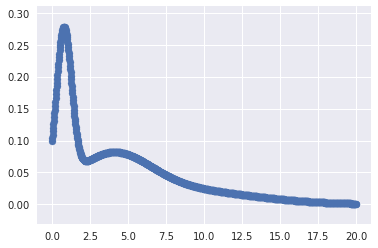

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [74]:
def LLE(data,priors,myComponents):
    probs = myMixture(data,priors,myComponents)
    lle = sum(np.log(probs))
    return lle

In [75]:
data = [0.5,0.8,1,5,6,9]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.2409977  0.27848641 0.25860841 0.07817698 0.06678651 0.03084732]


-12.787533770300744

In [76]:
data = [1,3,1,3,7,7]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.25860841 0.0755716  0.25860841 0.0755716  0.05265556 0.05265556]


-13.758196773544713

In [77]:
data = np.random.rand(100000)*20

(array([10064., 10028., 10101., 10122., 10044., 10051.,  9967.,  9963.,
         9886.,  9774.]),
 array([1.16786063e-04, 2.00009741e+00, 4.00007804e+00, 6.00005866e+00,
        8.00003929e+00, 1.00000199e+01, 1.20000005e+01, 1.39999812e+01,
        1.59999618e+01, 1.79999424e+01, 1.99999230e+01]),
 <a list of 10 Patch objects>)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


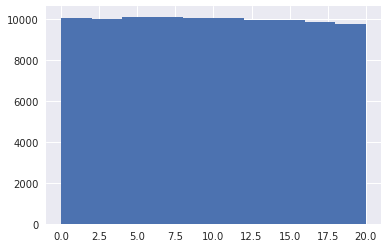

In [78]:
plt.hist(data)

In [79]:
LLE(data,priors,mycomps)/data.shape

array([-3.79756759])

In [80]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for comp,prior in zip(myComponents,priors):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData

In [81]:
tdata = genSample(10,priors,mycomps)
LLE(data,priors,mycomps)/data.shape
tdata[tdata<0]=0

In [82]:
print(tdata)

[0.45194484 0.         1.170277   2.57000205 0.85045268 3.11969684
 3.93104864 5.27988398 5.76328688 9.31999738]


(array([10064., 10028., 10101., 10122., 10044., 10051.,  9967.,  9963.,
         9886.,  9774.]),
 array([1.16786063e-04, 2.00009741e+00, 4.00007804e+00, 6.00005866e+00,
        8.00003929e+00, 1.00000199e+01, 1.20000005e+01, 1.39999812e+01,
        1.59999618e+01, 1.79999424e+01, 1.99999230e+01]),
 <a list of 10 Patch objects>)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


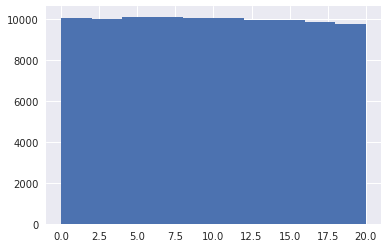

In [83]:
plt.hist(data)

In [84]:
#Gen time spent
time=[]
for i in range(15):
    time.append(tdata)
time_sp=np.array(time).ravel()
time_sp.shape

(150,)

In [85]:
time_spent=click_stream*time_sp    
time_spent.shape

(150,)

In [86]:
d={"Click":click_stream,"SessionID":usr_id,"UserID":usr_id,"Article_ID_Served":arti_id,"Article_Rank":art_rank,"Time_Spent":time_spent}

In [87]:
dtaframe=pd.DataFrame(d)

In [88]:
dtaframe

Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
0                 3099             1      0        1.0    0.000000     1.0
1                  697             2      1        1.0    0.000000     1.0
2                 3221             3      1        1.0    1.170277     1.0
3                  782             4      1        1.0    2.570002     1.0
4                 3136             5      1        1.0    0.850453     1.0
5                 4625             6      1        1.0    3.119697     1.0
6                 1039             7      0        1.0    0.000000     1.0
7                 1074             8      1        1.0    5.279884     1.0
8                 1265             9      0        1.0    0.000000     1.0
9                 1349            10      0        1.0    0.000000     1.0
10                4209             1      1        1.0    0.451945     1.0
11                1110             2      1        1.0    0.000000     1.0
12                1344             3      1        1.0    1.170277     1.0
13                3274             4      1        1.0    2.570002     1.0
14                1192             5      1        1.0    0.850453     1.0
15                 619             6      0        1.0    0.000000     1.0
16                 882             7      0        1.0    0.000000     1.0
17                1300             8      1        1.0    5.279884     1.0
18                2229             9      1        1.0    5.763287     1.0
19                1957            10      0        1.0    0.000000     1.0
20                1666             1      1        1.0    0.451945     1.0
21                3642             2      1        1.0    0.000000     1.0
22                3496             3      1        1.0    1.170277     1.0
23                3479             4      1        1.0    2.570002     1.0
24                1319             5      0        1.0    0.000000     1.0
25                 840             6      0        1.0    0.000000     1.0
26                1209             7      0        1.0    0.000000     1.0
27                1195             8      1        1.0    5.279884     1.0
28                2976             9      1        1.0    5.763287     1.0
29                1273            10      1        1.0    9.319997     1.0
..                 ...           ...    ...        ...         ...     ...
120               3322             1      1        3.0    0.451945     3.0
121               4160             2      0        3.0    0.000000     3.0
122                150             3      1        3.0    1.170277     3.0
123               3812             4      1        3.0    2.570002     3.0
124                200             5      1        3.0    0.850453     3.0
125                532             6      0        3.0    0.000000     3.0
126               4278             7      0        3.0    0.000000     3.0
127               1053             8      0        3.0    0.000000     3.0
128               4330             9      1        3.0    5.763287     3.0
129               2566            10      0        3.0    0.000000     3.0
130               3574             1      1        3.0    0.451945     3.0
131                824             2      1        3.0    0.000000     3.0
132               1190             3      0        3.0    0.000000     3.0
133               2693             4      0        3.0    0.000000     3.0
134                847             5      1        3.0    0.850453     3.0
135                360             6      1        3.0    3.119697     3.0
136               1240             7      0        3.0    0.000000     3.0
137               1203             8      0        3.0    0.000000     3.0
138               2333             9      1        3.0    5.763287     3.0
139                976            10      1        3.0    9.319997     3.0
140               3172             1      1        3.0    0.451945     3.0
141               2321        

In [89]:
np.where(dtaframe['Article_ID_Served']==325)

(array([], dtype=int64),)

In [90]:
any(dtaframe['Article_ID_Served'].duplicated())

True

In [91]:
ids = dtaframe["Article_ID_Served"]
dtaframe[ids.isin(ids[ids.duplicated()])]

Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
77               1235             8      0        2.0         0.0     2.0
97               1235             8      0        2.0         0.0     2.0

In [92]:
dtaframe['SessionID'][0:10]=1

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
dtaframe['SessionID'][10:20]=2

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
dtaframe['SessionID'][20:30]=3

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
dtaframe['SessionID'][30:40]=4

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
dtaframe['SessionID'][40:50]=5

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
dtaframe['SessionID'][50:100]=dtaframe['SessionID'][0:50]

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
dtaframe['SessionID'][100:150]=dtaframe['SessionID'][50:100]

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
dtaframe

Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
0                 3099             1      0        1.0    0.000000     1.0
1                  697             2      1        1.0    0.000000     1.0
2                 3221             3      1        1.0    1.170277     1.0
3                  782             4      1        1.0    2.570002     1.0
4                 3136             5      1        1.0    0.850453     1.0
5                 4625             6      1        1.0    3.119697     1.0
6                 1039             7      0        1.0    0.000000     1.0
7                 1074             8      1        1.0    5.279884     1.0
8                 1265             9      0        1.0    0.000000     1.0
9                 1349            10      0        1.0    0.000000     1.0
10                4209             1      1        2.0    0.451945     1.0
11                1110             2      1        2.0    0.000000     1.0
12                1344             3      1        2.0    1.170277     1.0
13                3274             4      1        2.0    2.570002     1.0
14                1192             5      1        2.0    0.850453     1.0
15                 619             6      0        2.0    0.000000     1.0
16                 882             7      0        2.0    0.000000     1.0
17                1300             8      1        2.0    5.279884     1.0
18                2229             9      1        2.0    5.763287     1.0
19                1957            10      0        2.0    0.000000     1.0
20                1666             1      1        3.0    0.451945     1.0
21                3642             2      1        3.0    0.000000     1.0
22                3496             3      1        3.0    1.170277     1.0
23                3479             4      1        3.0    2.570002     1.0
24                1319             5      0        3.0    0.000000     1.0
25                 840             6      0        3.0    0.000000     1.0
26                1209             7      0        3.0    0.000000     1.0
27                1195             8      1        3.0    5.279884     1.0
28                2976             9      1        3.0    5.763287     1.0
29                1273            10      1        3.0    9.319997     1.0
..                 ...           ...    ...        ...         ...     ...
120               3322             1      1        3.0    0.451945     3.0
121               4160             2      0        3.0    0.000000     3.0
122                150             3      1        3.0    1.170277     3.0
123               3812             4      1        3.0    2.570002     3.0
124                200             5      1        3.0    0.850453     3.0
125                532             6      0        3.0    0.000000     3.0
126               4278             7      0        3.0    0.000000     3.0
127               1053             8      0        3.0    0.000000     3.0
128               4330             9      1        3.0    5.763287     3.0
129               2566            10      0        3.0    0.000000     3.0
130               3574             1      1        4.0    0.451945     3.0
131                824             2      1        4.0    0.000000     3.0
132               1190             3      0        4.0    0.000000     3.0
133               2693             4      0        4.0    0.000000     3.0
134                847             5      1        4.0    0.850453     3.0
135                360             6      1        4.0    3.119697     3.0
136               1240             7      0        4.0    0.000000     3.0
137               1203             8      0        4.0    0.000000     3.0
138               2333             9      1        4.0    5.763287     3.0
139                976            10      1        4.0    9.319997     3.0
140               3172             1      1        5.0    0.451945     3.0
141               2321        

## User Profiling

In [100]:
weights=[]
for i in range(0,150):
    article=dtaframe['Article_ID_Served'][i]
    article_id_row=dtaframe[dtaframe['Article_ID_Served']==article]
    print(article_id_row)
    time_of_article=article_id_row['Time_Spent']
    avg_time=np.average(time_of_article)
    #print(time_of_article)
    weights.append(time_of_article.loc[i]/avg_time)

/home/manpreetdhingra1996/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
0               3099             1      0        1.0         0.0     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
1                697             2      1        1.0         0.0     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
2               3221             3      1        1.0    1.170277     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
3                782             4      1        1.0    2.570002     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
4               3136             5      1        1.0    0.850453     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
5               4625             6      1        1.0    3.119697     1.0
   Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
6               1039             7      0        1.

57               1222             8      1        1.0    5.279884     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
58               2557             9      0        1.0         0.0     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
59               4036            10      1        1.0    9.319997     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
60                 11             1      1        2.0    0.451945     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
61               4604             2      1        2.0         0.0     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
62               3600             3      1        2.0    1.170277     2.0
    Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
63               2836             4      1        2.0    2.570002     2.0
    Article_ID_Served  Article_Rank  C

     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
114                298             5      0        2.0         0.0     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
115               3311             6      1        2.0    3.119697     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
116               1210             7      1        2.0    3.931049     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
117                953             8      1        2.0    5.279884     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
118               4656             9      1        2.0    5.763287     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
119               4669            10      1        2.0    9.319997     3.0
     Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID
120               3322   

In [101]:
weights=np.array(weights)
weights[np.isnan(weights)]=0  #replacing nan values
weights

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.])

In [102]:
d={"Click":click_stream,"SessionID":usr_id,"UserID":usr_id,"Article_ID_Served":arti_id,"Article_Rank":art_rank,"Time_Spent":time_spent,'Weight':weights}

In [103]:
dtaframe=pd.DataFrame(d)

In [104]:
dtaframe

Article_ID_Served  Article_Rank  Click  SessionID  Time_Spent  UserID  \
0                 3099             1      0        1.0    0.000000     1.0   
1                  697             2      1        1.0    0.000000     1.0   
2                 3221             3      1        1.0    1.170277     1.0   
3                  782             4      1        1.0    2.570002     1.0   
4                 3136             5      1        1.0    0.850453     1.0   
5                 4625             6      1        1.0    3.119697     1.0   
6                 1039             7      0        1.0    0.000000     1.0   
7                 1074             8      1        1.0    5.279884     1.0   
8                 1265             9      0        1.0    0.000000     1.0   
9                 1349            10      0        1.0    0.000000     1.0   
10                4209             1      1        1.0    0.451945     1.0   
11                1110             2      1        1.0    0.000000     1.0   
12                1344             3      1        1.0    1.170277     1.0   
13                3274             4      1        1.0    2.570002     1.0   
14                1192             5      1        1.0    0.850453     1.0   
15                 619             6      0        1.0    0.000000     1.0   
16                 882             7      0        1.0    0.000000     1.0   
17                1300             8      1        1.0    5.279884     1.0   
18                2229             9      1        1.0    5.763287     1.0   
19                1957            10      0        1.0    0.000000     1.0   
20                1666             1      1        1.0    0.451945     1.0   
21                3642             2      1        1.0    0.000000     1.0   
22                3496             3      1        1.0    1.170277     1.0   
23                3479             4      1        1.0    2.570002     1.0   
24                1319             5      0        1.0    0.000000     1.0   
25                 840             6      0        1.0    0.000000     1.0   
26                1209             7      0        1.0    0.000000     1.0   
27                1195             8      1        1.0    5.279884     1.0   
28                2976             9      1        1.0    5.763287     1.0   
29                1273            10      1        1.0    9.319997     1.0   
..                 ...           ...    ...        ...         ...     ...   
120               3322             1      1        3.0    0.451945     3.0   
121               4160             2      0        3.0    0.000000     3.0   
122                150             3      1        3.0    1.170277     3.0   
123               3812             4      1        3.0    2.570002     3.0   
124                200             5      1        3.0    0.850453     3.0   
125                532             6      0        3.0    0.000000     3.0   
126               4278             7      0        3.0    0.000000     3.0   
127               1053             8      0        3.0    0.000000     3.0   
128               4330             9      1        3.0    5.763287     3.0   
129               2566            10      0        3.0    0.000000     3.0   
130               3574             1      1        3.0    0.451945     3.0   
131                824             2      1        3.0    0.000000     3.0   
132               1190             3      0        3.0    0.000000     3.0   
133               2693             4      0        3.0    0.000000     3.0   
134                847             5      1        3.0    0.850453     3.0   
135                360             6      1        3.0    3.119697     3.0   
136               1240             7      0        3.0    0.000000     3.0   
137               1203             8      0        3.0    0.000000     3.0   
138               2333             9      1        3.0    5.763287     3.0   
139                976     

In [105]:
topic_interest=[]
for i in range(0,150):
    articles=dtaframe['Article_ID_Served'][i]
    product=d2v[articles]*dtaframe['Weight'][i]
    topic_interest.append(product)

In [106]:
topic_interest=np.array(topic_interest)
topic_interest

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.12449557,  0.45510451,  0.18716229, ..., -0.54466668,
         0.13534582,  0.26620325],
       ...,
       [ 0.10504792,  0.30939653,  0.06631416, ..., -0.4663429 ,
         0.27440305,  0.48863929],
       [ 0.22897863,  0.21232008, -0.00094871, ..., -0.39744713,
         0.07709139,  0.41610053],
       [ 0.16170146,  0.36138103, -0.03048839, ..., -0.3349061 ,
        -0.02086163,  0.48990322]])

In [107]:
zzzz=pd.DataFrame(topic_interest)

In [108]:
zzzz

0         1         2         3         4         5         6    \
0    0.000000  0.000000  0.000000  0.000000  0.000000 -0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
2    0.124496  0.455105  0.187162  0.999551 -0.414454 -0.188572 -0.022359   
3    0.028219  0.320940  0.136998  0.586399 -0.466404 -0.055790  0.099910   
4   -0.012176  0.244007 -0.035300  0.270364 -0.238676  0.114187  0.222605   
5   -0.189012 -0.014175 -0.003538  0.223607 -0.128522  0.062802  0.058008   
6    0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
7    0.001465  0.316480  0.173582  0.744341 -0.261257 -0.208365 -0.055524   
8    0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
9    0.000000  0.000000 -0.000000  0.000000 -0.000000 -0.000000  0.000000   
10   0.086262  0.337778  0.331951  0.325187  0.113023  0.012777  0.142497   
11   0.000000  0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000   
12   0.481653  0.587332  0.174489  0.709432 -0.339472 -0.339062  0.102348   
13   0.227601  0.366175  0.367024  0.814291 -0.555034 -0.106332  0.064494   
14  -0.035637  0.082762 -0.020025  0.163104 -0.140354 -0.061296 -0.091638   
15   0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000   
16   0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000 -0.000000   
17  -0.047803  0.289944  0.166358  0.840738 -0.249149 -0.242595 -0.007831   
18   0.185074  0.421999  0.145277  0.713815 -0.352471 -0.144036  0.278002   
19   0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   
20   0.217522  0.114340 -0.204967  0.378126 -0.090951 -0.100857  0.192853   
21   0.000000  0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000   
22   0.320985  0.549300  0.030415  0.602252 -0.390776 -0.134341  0.067105   
23   0.271240  0.449462  0.264052  0.571568 -0.151801 -0.134416  0.034575   
24   0.000000 -0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000   
25  -0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000 -0.000000   
26  -0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000 -0.000000   
27  -0.103717  0.323765  0.130956  0.679641 -0.383447 -0.343233  0.009840   
28   0.250476  0.466102 -0.007497  0.617891 -0.359095 -0.226912  0.056235   
29   0.013812  0.561859  0.170609  0.495639 -0.240039 -0.267696  0.086853   
..        ...       ...       ...       ...       ...       ...       ...   
120  0.316275  0.243120 -0.127802  0.166927 -0.134091 -0.085633  0.267308   
121  0.000000  0.000000  0.000000  0.000000 -0.000000  0.000000  0.000000   
122  0.198495  0.350191 -0.119561  0.943454 -0.262952 -0.095696  0.086794   
123 -0.022864  0.389832 -0.019769  0.926847 -0.214298 -0.046695  0.242577   
124  0.089395  0.061594 -0.072575  0.214053 -0.143810 -0.059112  0.076696   
125  0.000000  0.000000 -0.000000  0.000000  0.000000 -0.000000  0.000000   
126  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
127  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
128  0.080915  0.333507  0.121140  0.601446 -0.273722 -0.191026  0.177723   
129 -0.000000  0.000000 -0.000000  0.000000 -0.000000 -0.000000  0.000000   
130  0.062794  0.036651  0.125942  0.532516 -0.334454 -0.171617  0.098645   
131  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000  0.000000   
132  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
133  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
134 -0.104690  0.048039  0.023635  0.122898 -0.149954  0.084545 -0.090285   
135  0.244246  0.130388  0.140708  0.203088 -0.035790  0.146076  0.273847   
136  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
137  0.000000  0.000000  0.000000  0.000000 -0.000000 -0.000000 -0.000000   
138  0.089659  0.488902  0.252879  0.460833 -0.337047 -0.114340  0.355346   
139  0.325324  0.401150  0.311171  0.359294 -0.655544 -0.028912  0.047538   
140 -0

In [109]:
#for user1
user1=zzzz.iloc[0:50,:].mean(axis=0)
len(user1)

300

In [110]:
#for user 2
user2=zzzz.iloc[50:100,:].mean(axis=0)
len(user2)

300

In [111]:
#for user 3
user3=zzzz.iloc[100:150,:].mean(axis=0)
len(user3)

300

In [112]:
user1=(pd.DataFrame(user1))

In [113]:
user1=user1.transpose()

In [114]:
user2=pd.DataFrame(user2)

In [115]:
user2=user2.transpose()

In [116]:
user3=pd.DataFrame(user3)
user3=user3.transpose()

In [117]:
concat=pd.concat([user1,user2], axis=0)

In [118]:
concatt=pd.concat([concat,user3],axis=0)
concatt

0         1         2         3         4         5         6    \
0  0.063701  0.195413  0.053687  0.344756 -0.160772 -0.079900  0.048372   
0  0.082768  0.218252  0.051030  0.387911 -0.209158 -0.064178  0.066250   
0  0.059428  0.173232  0.042918  0.302559 -0.142154 -0.044939  0.066917   

        7         8         9      ...          290       291       292  \
0 -0.216350  0.218583  0.273363    ...    -0.189488  0.017587 -0.268766   
0 -0.236300  0.223040  0.330751    ...    -0.217945  0.065618 -0.337513   
0 -0.191374  0.184456  0.244844    ...    -0.159022  0.039203 -0.233812   

        293       294       295       296       297       298       299  
0  0.019886 -0.161827 -0.069308 -0.056917 -0.220271  0.065175  0.162739  
0  0.035439 -0.154386 -0.093008 -0.015590 -0.250215  0.082142  0.206024  
0  0.018562 -0.106138 -0.053522 -0.044880 -0.193014  0.049200  0.169311  

[3 rows x 300 columns]

In [119]:
#Recommending top5 news

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [121]:
cosine_similarities5=linear_kernel(user1,d2v)

In [122]:
cosine_similarities5.ravel().argsort()[-5:]

array([2149, 1009,  898, 1470, 1552])

In [127]:
#recommending top3 news from finding similarities between users
cosine_u1u2=linear_kernel(user1,user2)
cosine_u2u3=linear_kernel(user2,user3)
cosine_u1u3=linear_kernel(user1,user3)

In [128]:
cosine_u1u2

array([[8.47566982]])

In [129]:
 '''sim_dict1={'1_2':cosine_u1u2,'1_3':cosine_u1u3}
print(max(sim_dict1, key=sim_dict1.get))
sim_dict2={'2_1':cosine_u1u2,'2_3':cosine_u2u3}
print(max(sim_dict2, key=sim_dict2.get))
sim_dict3={'3_1':cosine_u1u3,'3_2':cosine_u2u3}
print(max(sim_dict3, key=sim_dict3.get))'''

"sim_dict1={'1_2':cosine_u1u2,'1_3':cosine_u1u3}\nprint(max(sim_dict1, key=sim_dict1.get))\nsim_dict2={'2_1':cosine_u1u2,'2_3':cosine_u2u3}\nprint(max(sim_dict2, key=sim_dict2.get))\nsim_dict3={'3_1':cosine_u1u3,'3_2':cosine_u2u3}\nprint(max(sim_dict3, key=sim_dict3.get))"

In [130]:
 #Finding similar user for user1
if(cosine_u1u2>cosine_u1u3):
    t_user1=pd.concat((user1,user2))
else:
    t_user1=pd.concat((user1,user3))
t_user1=t_user1.mean(axis=0)
t_user1=pd.DataFrame(t_user1).transpose()
t_user1

0         1         2         3         4         5         6    \
0  0.073235  0.206833  0.052359  0.366333 -0.184965 -0.072039  0.057311   

        7         8         9      ...          290       291       292  \
0 -0.226325  0.220812  0.302057    ...    -0.203717  0.041602 -0.303139   

        293       294       295       296       297       298       299  
0  0.027662 -0.158106 -0.081158 -0.036253 -0.235243  0.073658  0.184382  

[1 rows x 300 columns]

In [131]:
#Finding similar user for user2
if(cosine_u1u2>cosine_u2u3):
    t_user2=pd.concat((user1,user2))
else:
    t_user2=pd.concat((user2,user3))
t_user2=t_user2.mean(axis=0)
t_user2=pd.DataFrame(t_user2).transpose()
t_user2

0         1         2         3         4         5         6    \
0  0.073235  0.206833  0.052359  0.366333 -0.184965 -0.072039  0.057311   

        7         8         9      ...          290       291       292  \
0 -0.226325  0.220812  0.302057    ...    -0.203717  0.041602 -0.303139   

        293       294       295       296       297       298       299  
0  0.027662 -0.158106 -0.081158 -0.036253 -0.235243  0.073658  0.184382  

[1 rows x 300 columns]

In [132]:
#Finding similar user for user3
if(cosine_u1u3>cosine_u2u3):
    t_user3=pd.concat((user3,user1))
else:
    t_user3=pd.concat((user3,user1))
t_user3=t_user3.mean(axis=0)
t_user3=pd.DataFrame(t_user3).transpose()
t_user3

0         1         2         3         4        5         6    \
0  0.061565  0.184323  0.048303  0.323657 -0.151463 -0.06242  0.057645   

        7        8         9      ...          290       291       292  \
0 -0.203862  0.20152  0.259103    ...    -0.174255  0.028395 -0.251289   

        293       294       295       296       297       298       299  
0  0.019224 -0.133982 -0.061415 -0.050898 -0.206643  0.057188  0.166025  

[1 rows x 300 columns]

In [134]:
#Recommending the middle 3 articles
#For user1
cos_sim1=linear_kernel(t_user1,d2v)
cos_sim1.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [135]:
#For user2
cos_sim2=linear_kernel(t_user2,d2v)
cos_sim2.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [136]:
#For user3
cos_sim3=linear_kernel(t_user3,d2v)
cos_sim3.ravel().argsort()[-3:]

array([ 898, 1470, 1552])

In [138]:
#recommendting last 2 news from the average of all user profiles  all_three=pd.concat((user1,user2,user3))  all_three_df=all_three.mean(axis=0)
all_three_df=pd.DataFrame(concatt).transpose()
all_three_df  


0         0         0
0    0.063701  0.082768  0.059428
1    0.195413  0.218252  0.173232
2    0.053687  0.051030  0.042918
3    0.344756  0.387911  0.302559
4   -0.160772 -0.209158 -0.142154
5   -0.079900 -0.064178 -0.044939
6    0.048372  0.066250  0.066917
7   -0.216350 -0.236300 -0.191374
8    0.218583  0.223040  0.184456
9    0.273363  0.330751  0.244844
10  -0.089054 -0.105480 -0.074825
11  -0.364930 -0.407887 -0.321900
12  -0.102684 -0.115476 -0.109562
13   0.252721  0.303536  0.227143
14  -0.347277 -0.371218 -0.271661
15   0.307411  0.339455  0.268792
16   0.086703  0.074931  0.061745
17   0.280623  0.334657  0.257138
18  -0.094111 -0.103864 -0.083036
19  -0.213109 -0.274494 -0.207655
20   0.080318  0.082174  0.076698
21   0.036904  0.092095  0.037039
22   0.164709  0.171975  0.123317
23   0.035698  0.060780  0.051264
24   0.106846  0.118846  0.049444
25  -0.193811 -0.247200 -0.180344
26  -0.261963 -0.294377 -0.225534
27   0.160215  0.204751  0.149724
28   0.086870  0.105775  0.088650
29  -0.160693 -0.171507 -0.134267
..        ...       ...       ...
270 -0.112812 -0.152135 -0.104761
271  0.277498  0.299948  0.270059
272  0.101010  0.086771  0.075379
273  0.088296  0.075119  0.064581
274  0.287762  0.325236  0.223553
275 -0.128419 -0.162968 -0.122209
276 -0.274441 -0.339748 -0.236805
277 -0.093073 -0.082853 -0.084574
278 -0.127034 -0.153304 -0.129248
279  0.318162  0.399870  0.288934
280 -0.136613 -0.163484 -0.114799
281  0.010952  0.037336  0.004564
282  0.062556  0.056661  0.049003
283  0.057546  0.077311  0.046128
284  0.141960  0.146316  0.113490
285 -0.114217 -0.116685 -0.088719
286 -0.149302 -0.171952 -0.150643
287  0.189190  0.212567  0.147220
288  0.173121  0.199755  0.160057
289  0.137014  0.154335  0.123000
290 -0.189488 -0.217945 -0.159022
291  0.017587  0.065618  0.039203
292 -0.268766 -0.337513 -0.233812
293  0.019886  0.035439  0.018562
294 -0.161827 -0.154386 -0.106138
295 -0.069308 -0.093008 -0.053522
296 -0.056917 -0.015590 -0.044880
297 -0.220271 -0.250215 -0.193014
298  0.065175  0.082142  0.049200
299  0.162739  0.206024  0.169311

[300 rows x 3 columns]

In [ ]:
cos_sim=linear_kernel(all_three_df,d2v)  
cos_sim.ravel().argsort()[-2:]